# Titanic Survival Data
## Correlations between Passenger Characteristics and Survival

## Investigation Overview

In this investigation, I am looking at the correlation between certain passengers' features and survival, with the main focus on (Age, Fare, having siblings/spouse/parent/chidren)

## Dataset Overview

The dataset used for this project consists of various information on 891 passengers that were aboard the ship. The information include: Passenger id, Name, survival (Yes or No), Ticket class, Sex, Age, relatives/siblings, Cabin and Embarkment. The data can be found at [Titanic Train Data](https://www.kaggle.com/c/titanic/data?select=train.csv)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load data set
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Making a copy of the data set for cleaning
titanic_clean = titanic_data.copy()
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#dropping Ticket and Cabin columns. They have a lot of null data and are not useful for the purpose of this exploration
titanic_clean.drop(['Ticket','Cabin'], axis = 1, inplace = True)

In [5]:
#dropping the two rows with null value for Embarked column
idx = titanic_clean[titanic_clean['Embarked'].isnull()].index.tolist()
titanic_clean.drop(idx, axis = 0, inplace = True)

In [6]:
#fill the null Age values with the mean of all Ages in the dataset
titanic_clean['Age'].fillna(titanic_clean['Age'].mean(), inplace = True)

In [7]:
#converting Pclass to ordered data
Pclass_order = [3, 2, 1]
Ordered_pclass = pd.api.types.CategoricalDtype(ordered = True, categories = Pclass_order)
titanic_clean['Pclass'] = titanic_clean['Pclass'].astype(Ordered_pclass)

In [8]:
#Creating new column to indicate passengers with sibligs/spouse
titanic_clean['has_SibSp'] = (titanic_clean['SibSp'] >= 1)

In [9]:
#Creating new column to indicate passengers with parent/child
titanic_clean['has_Parch'] = (titanic_clean['Parch'] >= 1)

In [10]:
# Final Data to be Used for Exploration 
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,has_SibSp,has_Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False,False


## Distribution of Passengers's Ages
The youngest passenger on board was less than 6 months old, while oldest passenger was 80 years. The age distribution is unimodal with majority of the passengers between the ages 20 and 30 years.

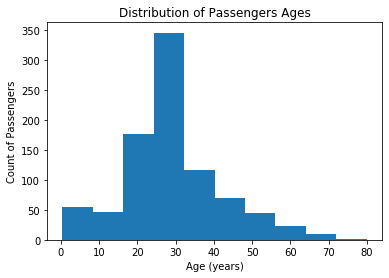

In [11]:
#distribution of the Passengers' ages
plt.hist(data = titanic_clean, x = 'Age')
plt.title('Distribution of Passengers Ages')
plt.xlabel('Age (years)')
plt.ylabel('Count of Passengers');

## Distribution of Ticket Class
Just as expected, majority of the passengers boarded 3rd class, while 2nd class had the fewest number of passengers.

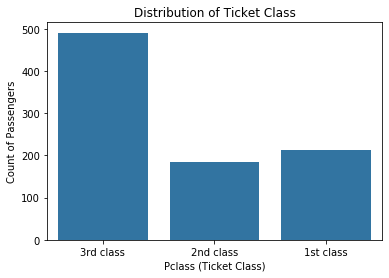

In [12]:
#distribution of the passengers in each ticket class
base_color = sb.color_palette()[0]
sb.countplot(data = titanic_clean, x = 'Pclass', color = base_color)
plt.title('Distribution of Ticket Class')
plt.xticks([0, 1, 2], ['3rd class', '2nd class', '1st class'])
plt.xlabel('Pclass (Ticket Class)')
plt.ylabel('Count of Passengers');

## Distribution of Survivors
Of the 891 passengers in this data set, only 342 survived, which is equivalent to approximately 38.4% of the dataset

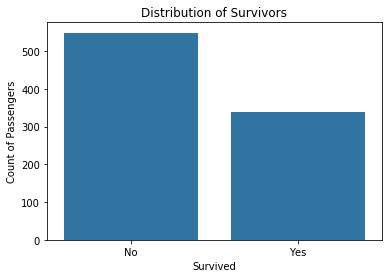

In [13]:
#distribution of Survivors
titanic_clean['Survived'] = titanic_clean['Survived'].replace((0,1),('No','Yes'))
sb.countplot(data = titanic_clean, x = 'Survived', color = base_color)
plt.title('Distribution of Survivors')
plt.xlabel('Survived')
plt.ylabel('Count of Passengers');

## Fare Distribution
The fare distribution is rightly skewed and unimodal, with majority of the passengers paying between 5 to 25 pounds. The xscale is limited to focus between 0 to 200 pounds.

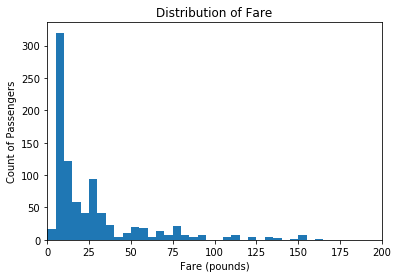

In [14]:
#fare distribution
bins = np.arange(0, 520, 5)
plt.hist(data = titanic_clean, x = 'Fare', bins = bins)
plt.xlim(0,200)
plt.title('Distribution of Fare')
plt.xlabel('Fare (pounds)')
plt.ylabel('Count of Passengers');

## Relationship between survived and Pclass
- A higher proportion of passengers in 1st class survived, compared to that of 2nd and 3rd class

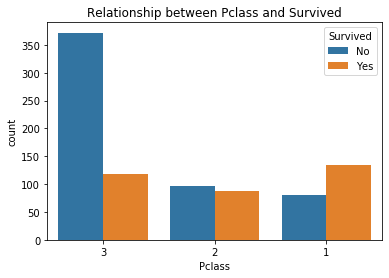

In [15]:
#Correlation between Pclass and Survived
sb.countplot(data = titanic_clean, x = 'Pclass', hue = 'Survived')
plt.title('Relationship between Pclass and Survived');

## Relationshi between Age and Survival, Fare and Survival
- For age, the median for both distributions of passengers that survived and those who didn't are relatively the same. This is because the majority of the passengers in both group fall within the same age bracket between 20 to 40 years.
- The median of the Fare of passengers that survived is more than those who did not survive. This can be related to the relationship between Pclass and survival. Majority of the 1st class passengers survived and they also paid more in fare.

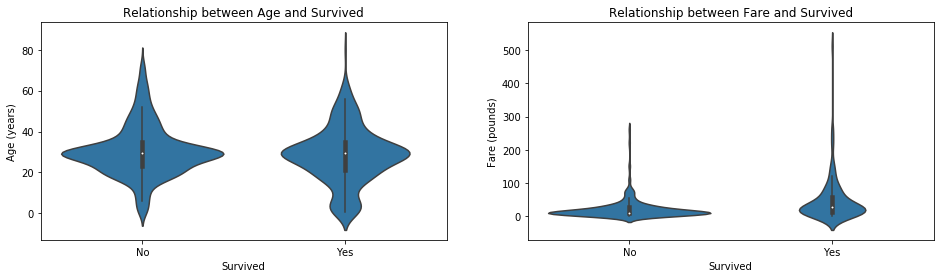

In [16]:
#Correlation between (Age and Survival, Fare and Survival)
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sb.violinplot(data = titanic_clean, x = 'Survived', y = 'Age', color = base_color)
plt.title('Relationship between Age and Survived')
plt.ylabel('Age (years)')

plt.subplot(1,2,2)
sb.violinplot(data = titanic_clean, x = 'Survived', y = 'Fare', color = base_color)
plt.title('Relationship between Fare and Survived')
plt.ylabel('Fare (pounds)');

## Relationship between Sex and survived, has_SibSp and Survived, has_Parch and survived
- A higher proportion of females survived, compared to males
- Having siblings/spouse seems not to affect survival rate, because even passengers with siblings/spouses did not have a higher proportion of survival.
- Passengers with parent/child have a slighly higher proprtion of survival.

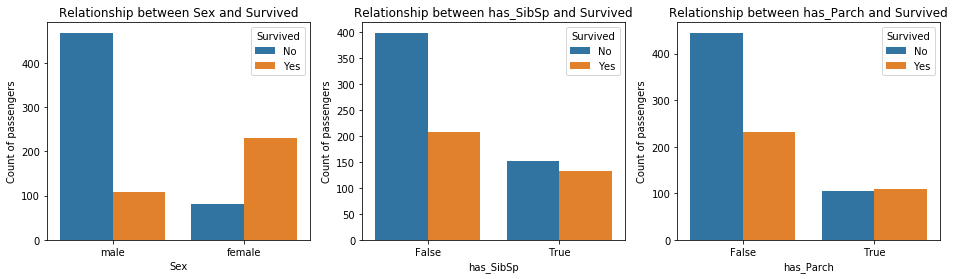

In [17]:
plt.figure(figsize = (16,4))
plt.subplot(1,3,1)
sb.countplot(data = titanic_clean, x = 'Sex', hue = 'Survived')
plt.title('Relationship between Sex and Survived')
plt.ylabel('Count of passengers')

plt.subplot(1,3,2)
sb.countplot(data = titanic_clean, x = 'has_SibSp', hue = 'Survived')
plt.title('Relationship between has_SibSp and Survived')
plt.ylabel('Count of passengers');

plt.subplot(1,3,3)
sb.countplot(data = titanic_clean, x = 'has_Parch', hue = 'Survived')
plt.title('Relationship between has_Parch and Survived')
plt.ylabel('Count of passengers');

## Relationship between Survived Fare and Age
- A higher proportion of passengers within the age bracket 15 and 50 years, and who paid fare higher than 70 pounds survived.

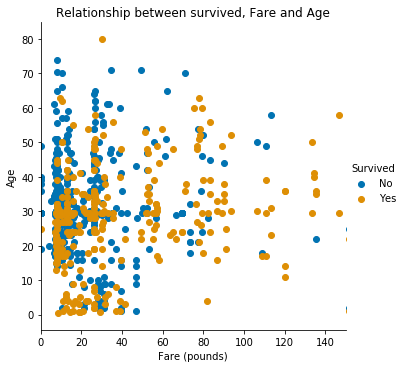

In [18]:
#relationship between, survived, Fare and Age
g = sb.FacetGrid(data = titanic_clean, hue = 'Survived', size = 5,palette = 'colorblind')
g.map(plt.scatter, 'Fare', 'Age')
plt.title('Relationship between survived, Fare and Age')
plt.xlabel('Fare (pounds)')
plt.xlim(0,150)
g.add_legend();